<a href="https://colab.research.google.com/github/Abhay182005dat/My_TensorFlow_Learning/blob/main/01_TensorFlow_Regression_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Intro To Neural Network Regression using TensorFlow
**There are many  definitions for a regression problem but in our case we are going to simplify it :) . Its like predicting a numerical variable based on some other combination of variables .**

In [2]:
# Import tensorflow
import tensorflow as tf
tf.__version__


'2.18.0'

###Creating data to view and fit

Text(0.5, 1.0, 'Simple visualization')

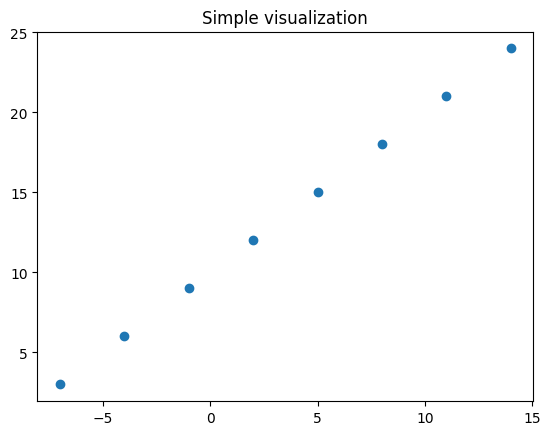

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Create Features
X = np.array([-7.0 , -4.0 , -1.0 , 2.0 , 5.0 , 8.0 , 11.0 , 14.0])

# Create labels
Y = np.array([3.0 , 6.0 , 9.0 , 12.0 , 15.0 , 18.0, 21.0 , 24.0])

# Visualize
plt.scatter(X,Y)
plt.title("Simple visualization")

In [4]:
Y == X+10

array([ True,  True,  True,  True,  True,  True,  True,  True])

### Input and Output shapes

In [5]:
# Craete a demo tensor for our housing price prediction problem
house_info = tf.constant(['bedroom', 'bathroom','garage'])
house_price = tf.constant([939700])
house_info , house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [6]:
input_shape = X.shape
output_shape = Y.shape
input_shape , output_shape

((8,), (8,))

In [7]:
# so we want X[0] as input to the output Y[0]
X[0] , Y[0]

(-7.0, 3.0)

In [8]:
input_shape = X[0].shape
output_shape = Y[0].shape
input_shape , output_shape  # No shape because there s no dimensions !

((), ())

In [9]:
X[0].ndim

0

In [10]:
# Turn out numpy arrays to float32

X = tf.cast(tf.constant(X) , dtype = tf.float32)
Y = tf.cast(tf.constant(Y) , dtype = tf.float32)
X,Y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [11]:
#X = tf.expand_dims(X,axis = 1)
#Y = tf.expand_dims(Y,axis = 1)
#X,Y

### Steps in modelling with Tensorflow
1. **Creating a model** - define the input and output layers as well as the hidden layers of a deep learning model.

2. **Compiling a model** - define the *loss function*(in other words the function which tells our model how wrong it is) and the *optimizer*(tells our model how to improve the patterns its learning) and *evaluation metrics*(what we can use to interpret the performance of the model)

3. **Fitting a model** - Letting the model try to find pattern between X and Y or features and labels.

```model = tf.keras.Sequential([tf.keras.Layers.Dense(1)]) ```

you can also write this in below method also


```
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1))
```




In [12]:
# set random seed (for more on the keras explanation and all.. https://chatgpt.com/share/67447f4f-cd8c-800b-8e27-b2dccd8a7d10)
tf.random.set_seed(42)

# 1. Create a model using the sequential API
model = tf.keras.Sequential([tf.keras.layers.Dense(1)],
                            [tf.keras.Input(shape=(1,))])


# tf.keras.sequential is a way to build a machine learning model by stacking layers one after another
# dense(1) number of our layers also tf.keras.layers.Dense is a layer in a neural network where every input connects to every output. It's called a fully connected layer.

 # 2. Compile the model
model.compile(loss = tf.keras.losses.mae, optimizer = tf.keras.optimizers.SGD() , # sgd is short for Stochaistic Gradient Descent (you can also write optimizer = "sgd")
               metrics = ["mae"])

 # SGD = It's an algorithm used to improve a machine learning model by adjusting its weights step by step to reduce errors.

 # 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), Y,epochs = 5) # axis =-1 adds a new dimension i.e 1 at last (8,1)

Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 10.9921 - mae: 10.9921
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 10.8596 - mae: 10.8596
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step - loss: 10.7271 - mae: 10.7271
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step - loss: 10.5946 - mae: 10.5946
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step - loss: 10.4621 - mae: 10.4621


#### Short explanation for myself :)
**Analogy:**
Think of each sample as a row in a spreadsheet. If you have only one column of data:

* Shape (8,): TensorFlow doesn't know if the 8 values are 8 samples (rows) or 8
features for a single sample.
* Shape (8, 1): Makes it clear there are 8 samples, each with 1 feature.

This is like a list of numbers, not a proper matrix. It looks like this:
```
[1, 2, 3, 4, 5, 6, 7, 8]
```
TensorFlow sees this and gets confused:

Are these 8 samples (one number each)?
Or is this 1 sample with 8 features (a row vector)?
```
[[1],
 [2],
 [3],
 [4],
 [5],
 [6],
 [7],
 [8]]

```


In [13]:
# So above is no our trained model
# check out X and Y
X ,Y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [14]:
# Try to make prediction with our model
y_pred = model.predict(np.array([17.0])) # The correct prediction is 27 keep it in mind ! we are adding 3

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 498ms/step


In [15]:
y_pred + 11 # we add 11 because mean abs error is about 11 that is we aree off by or behind 11 units here as model is not accurate

array([[26.206446]], dtype=float32)

## **Improving our model**
We can improve our model , by altering the steps we took to create our model .

1. **Creating a model** - here we might add more layers , increase the number of hidden layers , change the activation function of each layer .

2. **Compiling a model** - here we might change the optimization function or perhaps the **learning rate** of the optimization function.

3. **Fitting a Model** - Here we might fit a model for more **epochs**(leave it training for longer ) or on more data(give the model more examples to learn from)


In [16]:
# Lets rebuild the model
# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss= tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ['mae'])

# 3. fit the model
model.fit(tf.expand_dims(X , axis = -1),Y, epochs = 100)


Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 9.3721 - mae: 9.3721
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step - loss: 9.2396 - mae: 9.2396
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step - loss: 9.1071 - mae: 9.1071
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step - loss: 8.9746 - mae: 8.9746
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step - loss: 8.8421 - mae: 8.8421
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 335ms/step - loss: 8.7096 - mae: 8.7096
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 535ms/step - loss: 8.5771 - mae: 8.5771
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step - loss: 8.4446 - mae: 8.4446
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 634ms/step - loss: 8.3121 - mae: 8.3121
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 568ms/step - loss: 8.1796 - mae: 8.1796
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step - loss: 8.0471 - mae: 8.0471
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step - loss: 7.9146 - mae: 7.9146
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s

In [17]:
# Remind ourselves of the data
X,Y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [18]:
model.predict(np.array([17.0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


array([[29.762455]], dtype=float32)

The rectified linear unit (ReLU) or rectifier activation function introduces the property of nonlinearity to a deep learning model and solves the vanishing gradients issue. It interprets the positive part of its argument. It is one of the most popular activation functions in deep learning.

In [19]:
# Lets rebuild the model
# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50,activation = None),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss= tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
              metrics = ['mae'])

# 3. fit the model
model.fit(tf.expand_dims(X , axis = -1),Y, epochs = 100)


Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 12.4667 - mae: 12.4667
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 11.7441 - mae: 11.7441
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 11.0114 - mae: 11.0114
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 10.2658 - mae: 10.2658
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 9.5053 - mae: 9.5053
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 8.7281 - mae: 8.7281
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 7.9319 - mae: 7.9319
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 7.1145 - mae: 7.1145
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 6.8197 - mae: 6.8197
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 7.2057 - mae: 7.2057
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 7.5310 - mae: 7.5310
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 7.7619 - mae: 7.7619
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61

In [20]:
y_pred = model.predict(np.array([17.0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


In [21]:
y_pred   # We know that the answer is 27 but our model is OVERFITTING  which means our model is performing too well on the sample .
         # this was the case when there was this code  tf.keras.layers.Dense(100,activation = 'relu'),  with SGD metrics.
         #                                             tf.keras.layers.Dense(100,activation = 'relu'),

array([[27.162682]], dtype=float32)

**So, Some of the common ways to improve a deep model are :
* Adding layers
* Increase the number of hidden units
* Change the activation functions
* Change the optimization function
* Change the learning rate
* Fitting on more data



### Evaluating the Model
In practice a typical workflow you'll go through when building neural networks is :

```
Build a model -> fit it -> evaluate it -> tweak the model -> fit it -> evaluate-> and so on ...
```

When it comes to evaluation... there are 3 words you should memorize
> " Visualize , visualize , visualise "
Its a good idea to visualize:
* The data - what data are we working with ? What does it look like?
* The model itself - what does our model look like ?
* The training of a model - how does a model perform while it learns ?
* The predictions of the mode - how do the predictions of a model line up against the grounf truth(original lables) ?

In [24]:
# Make a bigger dataset
X = tf.range(-100, 100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [25]:
y = X+10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

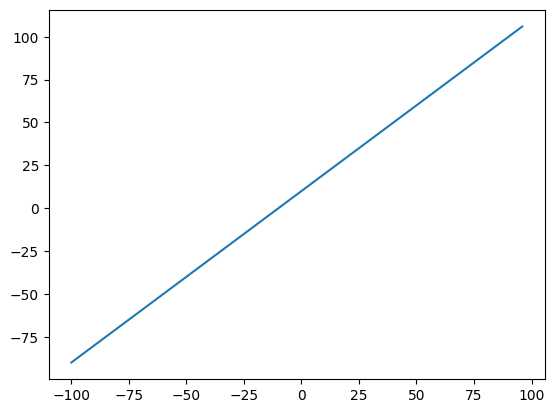

In [26]:
# Visualize the data
import matplotlib.pyplot as plt
plt.plot(X,y)